In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit
from utils.functions import PiecewiseLinear

In [43]:
data_path = os.path.dirname(os.path.abspath("")) + '/analysis/plant_data/plant_area_data.csv'
df = pd.read_csv(data_path).sort_values(by='timestamp')
df['timestamp'] = pd.to_datetime(df['timestamp'])
sub_df0=df

In [44]:
# Number of time steps per day
sub_df0['timestamp'] = pd.to_datetime(sub_df0['timestamp'])
timestamps_per_day = sub_df0['timestamp'].dt.date.value_counts()
if timestamps_per_day.nunique() != 1:
    raise ValueError(f"Inconsistent timestamps per day: {timestamps_per_day.to_dict()}")
steps_per_day = timestamps_per_day.iloc[0]
print(f'steps_per_day={steps_per_day}')

# Number of time steps per night
time_increment = sub_df0['timestamp'].diff().mode()[0]
night_duration = df.groupby(sub_df0['timestamp'].dt.date)['timestamp'].first().shift(-1) - sub_df0.groupby(sub_df0['timestamp'].dt.date)['timestamp'].last()
steps_per_night = int((night_duration.mode()[0] / time_increment)-1)
print(f'steps_per_night={steps_per_night}')

steps_per_day=72
steps_per_night=72


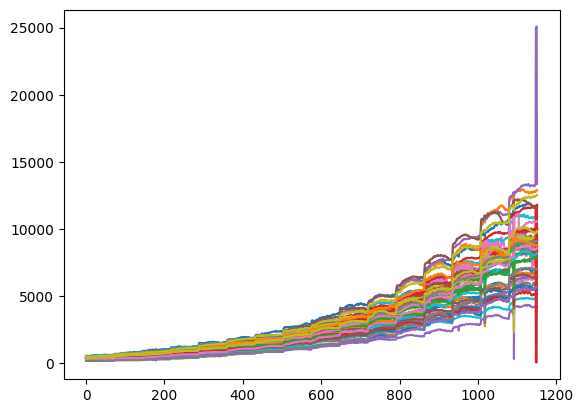

In [45]:
area0 = np.array(sub_df0.drop(columns=['timestamp']))
zero_idx = np.unique(np.where(area0==0)[1])
area0 = np.delete(area0, [5, 11, 20, 25, 28, 32, 34, 35, 41, 42, 43, 44, 48, 49, 56], axis=1)
for i in range(area0.shape[1]):
    plt.plot(area0[:,i], label = i)

In [46]:
def iqm(num_plants, outliers, values):
    values = np.sort(values)
    return np.mean(values[outliers:num_plants-outliers])

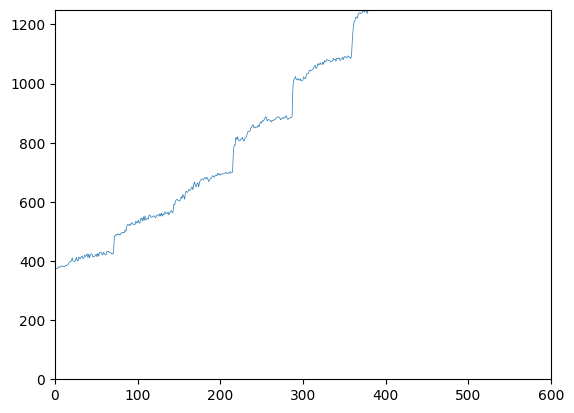

In [56]:
# Averaging all 16 plants
ave_area0 = [iqm(49, 4, area0[i,:]) for i in range(area0.shape[0])]
plt.plot(ave_area0, linewidth=0.5)
plt.xlim(0,600)
plt.ylim(0,1250)
# Smoothing
def moving_average(x, trace_decay_rate = 0.9):
    smooth_x = [x[0]]
    for i in range(1, len(x)):
        smooth_x.append(trace_decay_rate * smooth_x[-1] + (1-trace_decay_rate)*x[i])
    return np.array(smooth_x)
smooth_ave_area0 = moving_average(ave_area0)
#plt.plot(smooth_ave_area0)
